# **Automatidata project - EDA**


In [117]:
# import libraries and packages
import numpy as np
import pandas as pd

# import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import packages for hypothesis test
import scipy.stats as stats

# datetime
import datetime

In [118]:
# load the dataset into dataframe
df = pd.read_csv('C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\2017_Yellow_Taxi_Trip_Data.csv')

In [119]:
# view first 10 rows of data
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [120]:
# display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [121]:
# Check for missing data and duplicates

# Check for duplicates
print('Shape of data:', df.shape)
print('Shape after dropping duplicates:',df.drop_duplicates().reset_index(drop=True).shape)

# Check for missing data
print('Missing values:', df.isna().sum().sum())

Shape of data: (22699, 18)
Shape after dropping duplicates: (22699, 18)
Missing values: 0


There are no missing values nor duplicates in the dataset. Datetime columns are of type object which will be converted to datetime later.

In [122]:
# display descriptive statistics
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


There are clearly some outliers in the data. Notice that the `fare_amount` has a minimum value of -120 and maximum of 999. Also, there are `trip_distance` with 0 which should be examined and `total_amount` has extreme min and max values.

In [123]:
# obtain value counts for each payment type
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

According to the data dictionary, the payment method was encoded as follows:

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [124]:
# calculate average tip paid with credit card
avg_tip_credit = df[df['payment_type'] == 1]['tip_amount'].mean()
print('Average tip for trips paid with credit card:',avg_tip_credit)

# calculate average tip paid with cash
avg_tip_cash = df[(df['payment_type'] == 2)]['tip_amount'].mean()
print('Average tip for trips paid with cash:',avg_tip_cash)

Average tip for trips paid with credit card: 2.7298001965279934
Average tip for trips paid with cash: 0.0


VendorID: A code indicating the TPEP provider that provided the record.  

1= Creative Mobile Technologies, LLC;</br> 
2= VeriFone Inc.

In [125]:
# obtain value_counts of VendorID
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [126]:
# calculate mean total_amount for each vendorID
df.groupby('VendorID').agg({'total_amount':['mean']})

,total_amount
,mean
VendorID,
1,16.298119
2,16.320382


In [127]:
# filter data for only payments through credit card
df_credit = df[df['payment_type']==1]

# obtain value_counts of the payment based on 'passenger_count'
df_credit['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

In [128]:
# obtain passenger value_counts
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [129]:
# calculate mean tip amount by passenger counts
df_passenger_tip = df.groupby(['passenger_count'])[['tip_amount']].mean()
df_passenger_tip

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [130]:
# calculate avergae tip amount for each passenger count for credit card payments only
df_credit = df[df['payment_type']==1]
df_credit.groupby('passenger_count')[['tip_amount']].mean()

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


In [131]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Data Visualization

Text(0.5, 1.0, 'Trip Distance Boxplot')

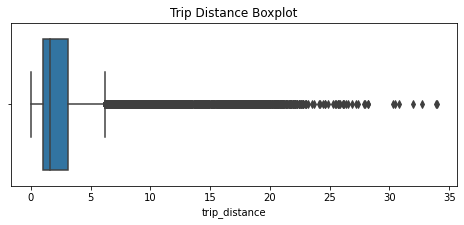

In [132]:
# Create box plot of trip_distance
plt.figure(figsize=(8,3))
sns.boxplot(x=df['trip_distance'])
plt.title('Trip Distance Boxplot')

Text(0.5, 1.0, 'Distribution of Trip Distance')

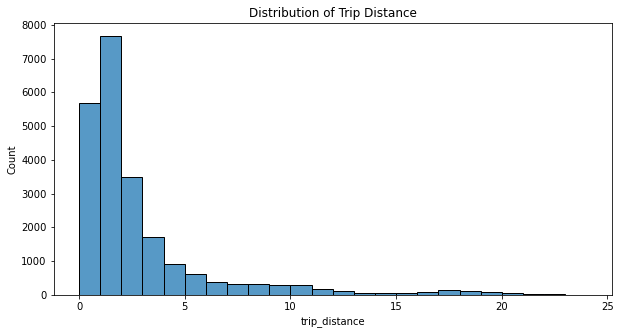

In [133]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(x=df['trip_distance'], bins=range(0,25,1))
plt.title('Distribution of Trip Distance')

Text(0.5, 1.0, 'Total Amount Boxplot')

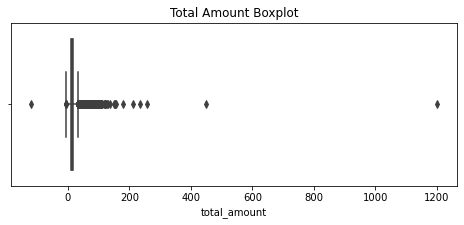

In [134]:
# Create box plot of total_amount
plt.figure(figsize=(8,3))
sns.boxplot(x=df['total_amount'])
plt.title('Total Amount Boxplot')

Text(0.5, 1.0, 'Total Amount Distribution')

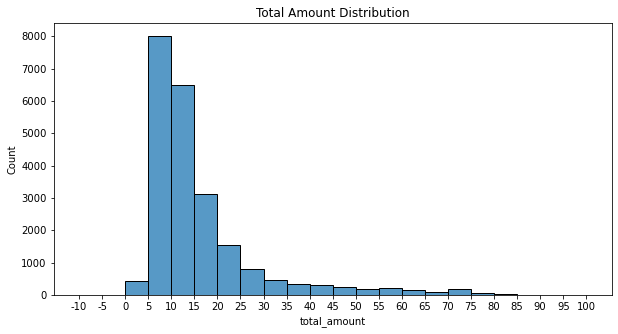

In [135]:
# Create histogram of total_amount
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['total_amount'],bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total Amount Distribution')

Text(0.5, 1.0, 'Tip Amount Boxplot')

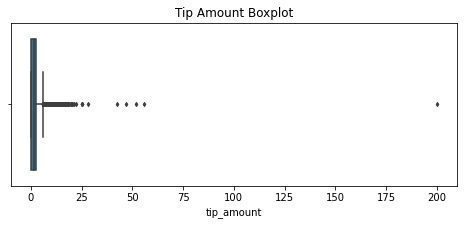

In [136]:
# Create box plot of tip_amount
plt.figure(figsize=(8,3))
sns.boxplot(x=df['tip_amount'], fliersize=3)
plt.title('Tip Amount Boxplot')

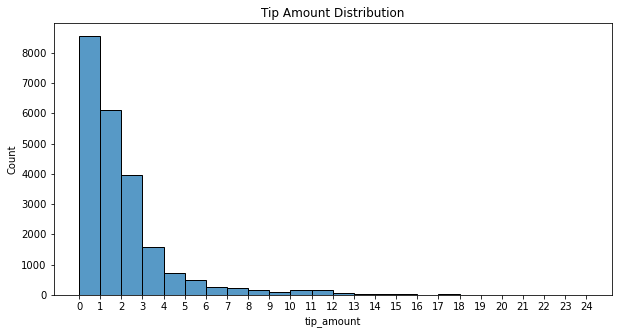

In [137]:
# Create histogram of tip_amount
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['tip_amount'], bins=range(0,25,1))
ax.set_xticks(range(0,25,1))
ax.set_xticklabels(range(0,25,1))
plt.title('Tip Amount Distribution');

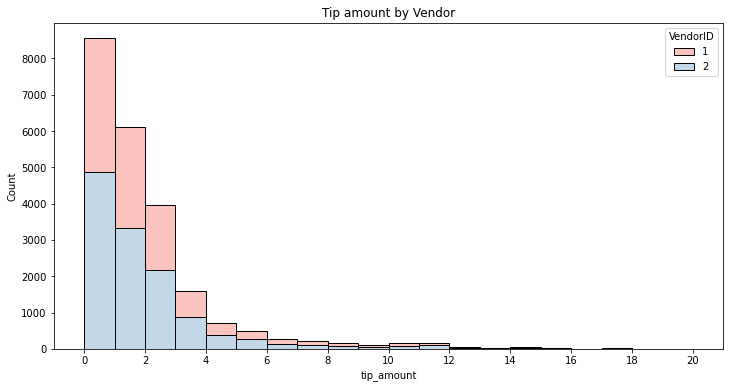

In [138]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,6))
ax = sns.histplot(data = df, 
                  x='tip_amount', 
                  bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack', 
                  palette='Pastel1',
                  alpha=0.8)
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount by Vendor');

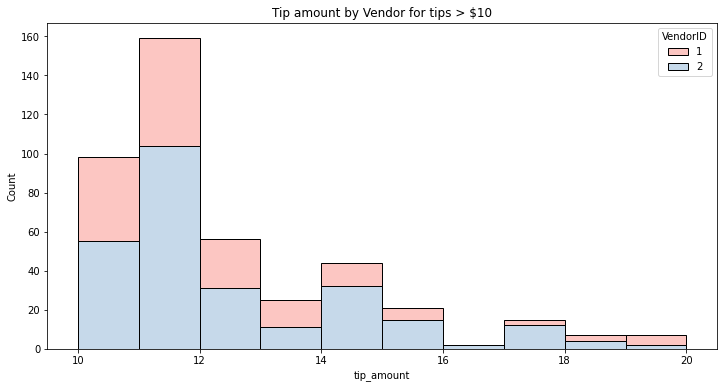

In [139]:
# Create histogram of tip_amount by vendor for tips > $10 
df_tip = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,6))
ax = sns.histplot(data = df_tip, 
                  x='tip_amount', 
                  bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack', 
                  palette='Pastel1')
ax.set_xticks(range(10,21,2))
ax.set_xticklabels(range(10,21,2))
plt.title('Tip amount by Vendor for tips > $10');

Text(0.5, 1.0, 'Mean Tip by Passenger Count')

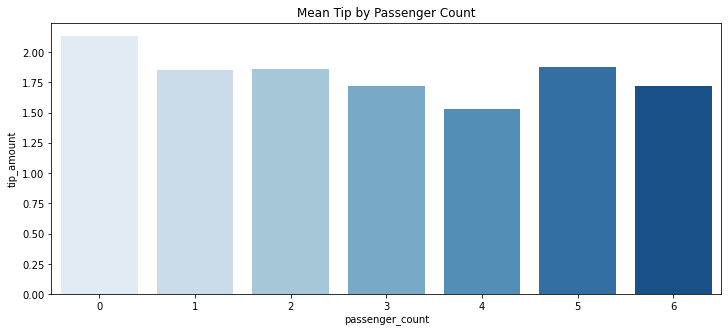

In [140]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(12,5))
sns.barplot(data=df_passenger_tip, 
            x=df_passenger_tip.index, 
            y='tip_amount', 
            palette='Blues')
plt.title('Mean Tip by Passenger Count')

In [141]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [142]:
# Get total number of rides for each month
rides_per_month = df['month'].value_counts()
rides_per_month

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [143]:
# Reorder the monthly ride list so months go in order
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
rides_per_month = df['month'].sort_values().value_counts(sort=False)
rides_per_month

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

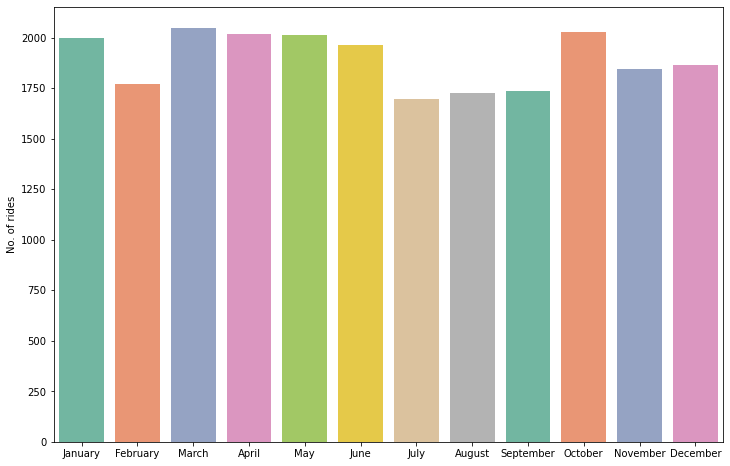

In [144]:
# create bar plot to plot rides_per_month
plt.figure(figsize=(12,8))
sns.barplot(x=rides_per_month.index,
            y=rides_per_month,
            palette='Set2')
plt.ylabel('No. of rides')
plt.show()

In [145]:
# Calculate time for rides by day
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day'] = pd.Categorical(df['day'], categories=days, ordered=True)
rides_per_day = df['day'].value_counts().sort_values(ascending=True)
rides_per_day = rides_per_day.reindex(index=days)
rides_per_day

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

Text(0.5, 1.0, 'Rides per Day')

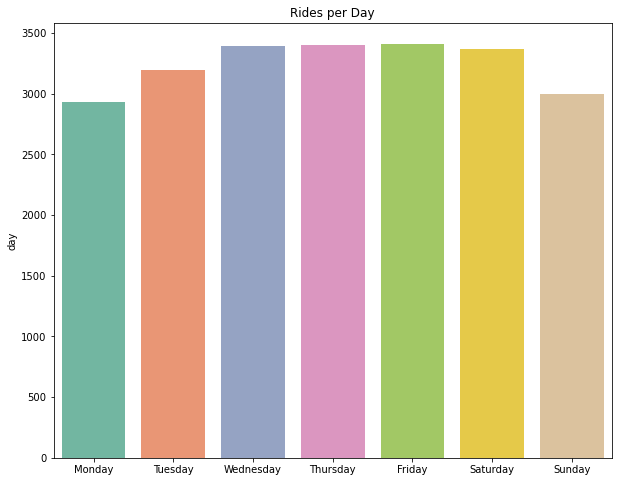

In [146]:
# Create bar plot for ride count by day
plt.figure(figsize=(10,8))
ax = sns.barplot(x=rides_per_day.index,
                 y=rides_per_day, 
                 palette='Set2')
ax.set_xticklabels(days)
plt.title('Rides per Day')

In [147]:
# calculate total revenue by day
daily_revenue = df.groupby(['day']).sum(numeric_only=True)[['total_amount']]
daily_revenue

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


Text(0.5, 1.0, 'Revenue by Day')

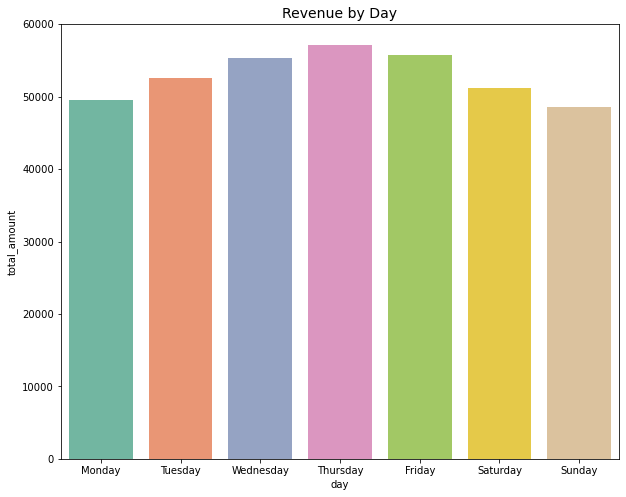

In [148]:
# Create bar plot of total revenue by day
plt.figure(figsize=(10,8))
ax = sns.barplot(data=daily_revenue, 
                 x=daily_revenue.index, 
                 y='total_amount', 
                 palette='Set2')
ax.set_xticklabels(days)
plt.title('Revenue by Day', fontsize=14)

In [149]:
# calculate total revenue by month
monthly_revenue = df.groupby(['month']).sum(numeric_only=True)[['total_amount']]
monthly_revenue

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Revenue by Month')

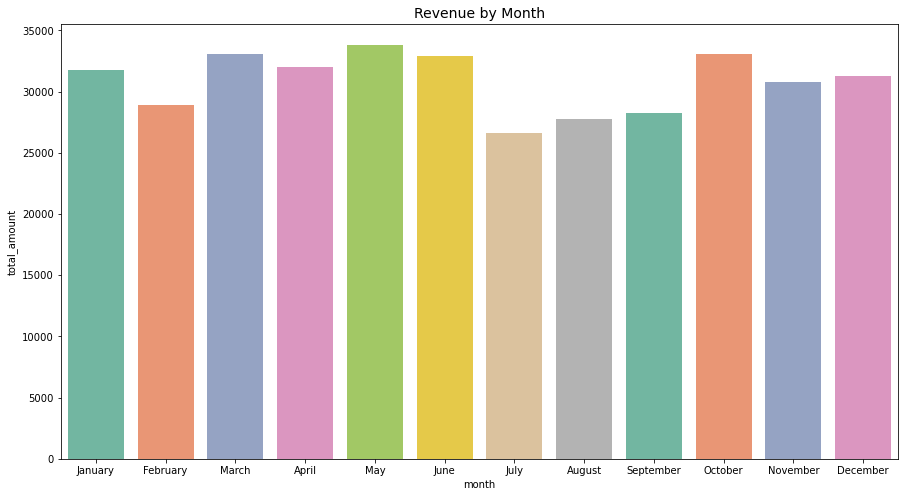

In [150]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(15,8))
ax = sns.barplot(x=monthly_revenue.index, 
                 y=monthly_revenue.total_amount,
                 palette='Set2')
ax.set_xticklabels(months)
plt.title('Revenue by Month', fontsize=14)

In [151]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [152]:
# Calculate the mean trip distance for each drop-off location
mean_trip = df.groupby(['DOLocationID']).mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
mean_trip.sort_values(by='trip_distance',ascending=True, inplace=True)
mean_trip

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean Trip Distances')

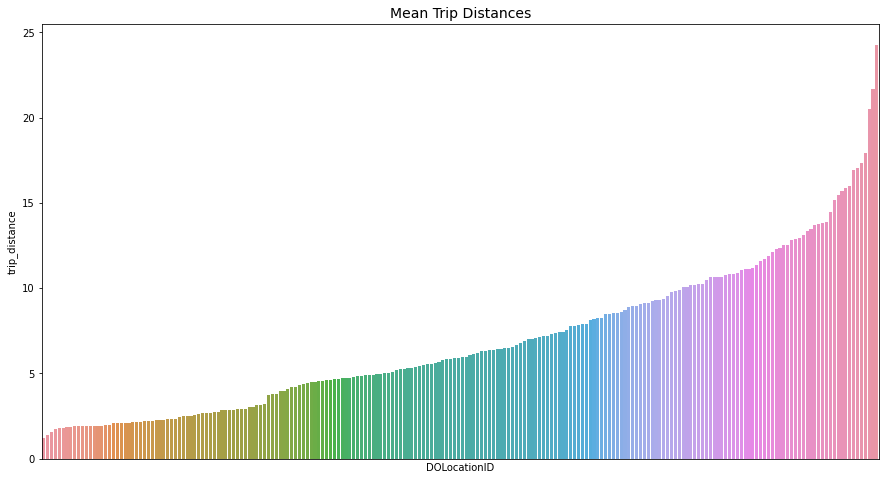

In [153]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(15,8))
ax = sns.barplot(x=mean_trip.index, 
                 y=mean_trip['trip_distance'], 
                 order=mean_trip.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distances', fontsize=14)

# Hypothesis Testing

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

The steps for conducting a hypothesis test: 

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 

In [154]:
credit = df[df['payment_type']==1] # credit card payments
cash = df[df['payment_type']==2] # cash payments

credit_mean = credit['fare_amount'].mean() # credit fare_amount mean
cash_mean = cash['fare_amount'].mean() # cash fare_amount mean

print('Mean fare amount by credit cards:',credit_mean)
print('Mean fare amount by cash:', cash_mean)

# perform two-sample t-test
# choose the significance value as 5%
tscore, pvalue = stats.ttest_ind(a=credit['fare_amount'], b=cash['fare_amount'], equal_var=False) 

print('t-score:',tscore)
print('p-value:',pvalue)

Mean fare amount by credit cards: 13.42974778905994
Mean fare amount by cash: 12.21354616760699
t-score: 6.866800855655372
p-value: 6.797387473030518e-12


The calculated p-value is lesser than the significance value. Therefore, we reject null hypothesis and accept the alternative hypothesis that there is statistical significant evidence between difference of average fare amount paid by credit card and cash.